In [1]:
#import packages that needed for Task B
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import wraps
import plotly.express as px


In [2]:
#add code to read csv files and import it 
GDP = pd.read_csv("gdppercapita_us_inflation_adjusted.csv")

Health_spending = pd.read_csv("total_health_spending_percent_of_gdp.csv")

Income = pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")

HDI = pd.read_csv("hdi_human_development_index.csv")

Life_Expectancy = pd.read_csv("Life_expectancy_years.csv")

World = pd.read_csv("world_regions.csv")

## (1)

In [3]:
#Display one of the csv file's DataFrame to have a brief view of the data set
GDP.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.6k,26.2k,27.1k,27k,28.4k,28.8k,29.3k,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,512,558,569,565,556,553,553,547,555,530
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3980,4170,4220,4270,4170,3920,3790,3600,3460,3170
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3680,3740,3780,3860,3950,4090,4250,4430,4540,4390
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35k,33.8k,33.2k,34.7k,35.8k,37.4k,37.7k,38.3k,39k,34.3k


In [4]:
#Data cleaning : Convert "K" to 1000
def k_to_1000 (x):
    if type(x) == float or type(x) == int: 
        return x 
    if type(x) == str: 
        if 'k' in x: 
            return float(x[:-1]) * 1000.0 
    return float(x)

In [5]:
#clean up the data for every DataFrame that has 'k': convert all the 'k' to number
#GDP
GDP1 = GDP.iloc[:,0]
GDP2 = GDP.iloc[:,1:]
GDP2 = GDP2.applymap(k_to_1000)
GDP = pd.concat([GDP1, GDP2], axis = 1 )
GDP.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26600.0,26200.0,27100.0,27000.0,28400.0,28800.0,29300.0,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,512.0,558.0,569.0,565.0,556.0,553.0,553.0,547.0,555.0,530.0
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3980.0,4170.0,4220.0,4270.0,4170.0,3920.0,3790.0,3600.0,3460.0,3170.0
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3680.0,3740.0,3780.0,3860.0,3950.0,4090.0,4250.0,4430.0,4540.0,4390.0
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35000.0,33800.0,33200.0,34700.0,35800.0,37400.0,37700.0,38300.0,39000.0,34300.0


In [6]:
#clean up the data for every DataFrame that has 'k': convert all the 'k' to number
#Income
Income1 = Income.iloc [:,0]
Income2 = Income.iloc [:,1:]
Income2 = Income2.applymap(k_to_1000)
Income = pd.concat([Income1, Income2],axis =1)
Income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690.0,2750.0,2810.0,2870.0,2930.0,2990.0,3060.0,3120.0,3190.0,3260.0
1,Angola,700,702,705,709,711,714,718,721,725,...,8000.0,8170.0,8350.0,8530.0,8710.0,8900.0,9090.0,9280.0,9480.0,9690.0
2,Albania,755,755,755,755,755,756,756,756,756,...,25100.0,25600.0,26200.0,26700.0,27300.0,27900.0,28500.0,29100.0,29700.0,30400.0
3,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,68900.0,70400.0,71900.0,73400.0,75000.0,76600.0,78300.0,80000.0,81700.0,83400.0
4,United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,...,101000.0,103000.0,105000.0,107000.0,110000.0,112000.0,114000.0,117000.0,119000.0,122000.0


In [7]:
#Transpose DataFrame index and columns
GDP.T

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
country,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Uzbekistan,St. Vincent and the Grenadines,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,7360.0,NaN,NaN,NaN,...,NaN,1840.0,NaN,NaN,NaN,NaN,NaN,3840.0,1220.0,1160.0
1961,NaN,NaN,NaN,NaN,NaN,NaN,7640.0,NaN,NaN,NaN,...,NaN,1900.0,NaN,NaN,NaN,NaN,NaN,3890.0,1200.0,1200.0
1962,NaN,NaN,NaN,NaN,NaN,NaN,7450.0,NaN,NaN,NaN,...,NaN,1940.0,NaN,NaN,NaN,NaN,NaN,4030.0,1140.0,1170.0
1963,NaN,NaN,NaN,NaN,NaN,NaN,6950.0,NaN,NaN,NaN,...,NaN,1800.0,NaN,NaN,NaN,NaN,NaN,4220.0,1140.0,1210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,28800.0,553.0,3920.0,4090.0,37400.0,39400.0,13400.0,3600.0,11900.0,14900.0,...,2870.0,7030.0,34600.0,2190.0,2750.0,4380.0,1420.0,6210.0,1350.0,1430.0
2017,29300.0,553.0,3790.0,4250.0,37700.0,39800.0,13600.0,3860.0,11100.0,15200.0,...,2940.0,7080.0,34400.0,2320.0,2850.0,4410.0,1310.0,6190.0,1350.0,1480.0
2018,NaN,547.0,3600.0,4430.0,38300.0,39700.0,13100.0,4050.0,11400.0,16100.0,...,3050.0,7210.0,35100.0,2460.0,2860.0,4340.0,1290.0,6200.0,1370.0,1530.0
2019,NaN,555.0,3460.0,4540.0,39000.0,40400.0,12700.0,4350.0,11400.0,16800.0,...,3160.0,7220.0,36000.0,2600.0,2900.0,4500.0,NaN,6130.0,1350.0,1410.0


In [8]:
#Transpose DataFrame index and columns for DataFrame's descriptive statistics.
GDP_des = GDP.describe().T
GDP_des

,count,mean,std,min,25%,50%,75%,max
1960,87.0,4612.390805,6739.589804,179.0,791.0,1730.0,4140.0,37900.0
1961,91.0,4625.912088,6849.582546,145.0,780.0,1660.0,4040.0,38800.0
1962,91.0,4755.043956,7013.033810,145.0,799.0,1620.0,4345.0,39500.0
1963,91.0,4894.846154,7148.905823,155.0,815.5,1790.0,4725.0,39000.0
1964,91.0,5153.417582,7623.047190,156.0,828.5,1850.0,5015.0,42300.0
...,...,...,...,...,...,...,...,...
2016,205.0,16001.765854,23080.087810,294.0,2190.0,6020.0,19700.0,170000.0
2017,205.0,16241.204878,23233.412830,286.0,2290.0,6190.0,19900.0,163000.0
2018,204.0,16445.264706,23805.179498,282.0,2335.0,6230.0,19800.0,171000.0
2019,202.0,16670.455446,24361.427576,278.0,2442.5,6435.0,19600.0,182000.0


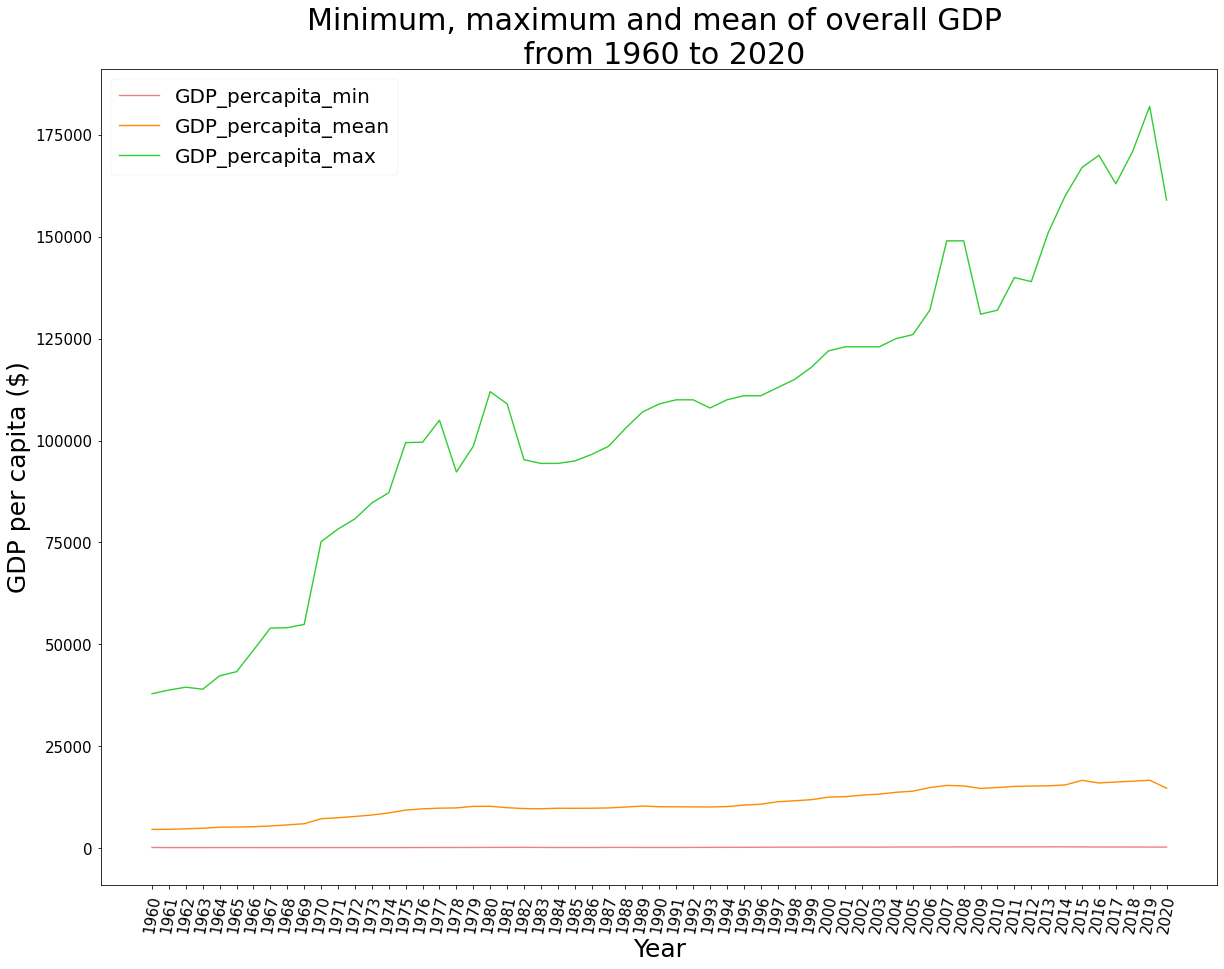

In [9]:
#Sketch a plot for DataFrame's Descriptive statistics -GDP
#Adjust the size, fontsize, color labels and title for the figure.
plt.style.use('seaborn-paper')
plt.figure(figsize=(20, 15))

plt.plot(GDP_des.index,GDP_des['min'],color='lightcoral', label = 'GDP_percapita_min')
plt.plot(GDP_des.index,GDP_des['mean'],color='darkorange',label = 'GDP_percapita_mean')
plt.plot(GDP_des.index,GDP_des['max'],color='limegreen',label = 'GDP_percapita_max')

plt.xlabel("Year",fontsize=25)
plt.xticks(rotation=80, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("GDP per capita ($)",fontsize =25)
plt.title('Minimum, maximum and mean of overall GDP \n from 1960 to 2020', fontsize = 30)
plt.legend(loc = 'best',prop={'size': 20})

plt.show()


In [10]:
#Read the Health_spending Dataframe's descriptive statistics
#Transpose DataFrame index and columns for DataFrame's descriptive statistics.
Health_spending_des = Health_spending.describe().T
Health_spending_des

,count,mean,std,min,25%,50%,75%,max
1995,189.0,5.790265,2.448863,1.95,3.9300,5.250,7.0700,18.1
1996,190.0,5.901316,2.655962,1.69,3.9625,5.425,7.4100,21.8
1997,190.0,5.939000,2.593936,1.69,4.1450,5.535,7.3100,22.9
1998,191.0,6.067330,2.620681,1.74,4.4150,5.580,7.2900,20.9
1999,191.0,6.019634,2.493125,1.73,4.3750,5.750,7.3450,20.4
2000,191.0,6.064555,2.645971,1.93,4.3750,5.790,7.3300,22.6
2001,190.0,6.175632,2.572764,1.99,4.5800,5.690,7.4150,19.5
2002,190.0,6.311895,2.565992,1.12,4.4950,5.965,7.9375,18.3
2003,190.0,6.373789,2.601206,2.28,4.6475,5.920,7.7050,21.1
2004,190.0,6.457947,2.689196,2.09,4.4025,6.030,8.0200,16.4


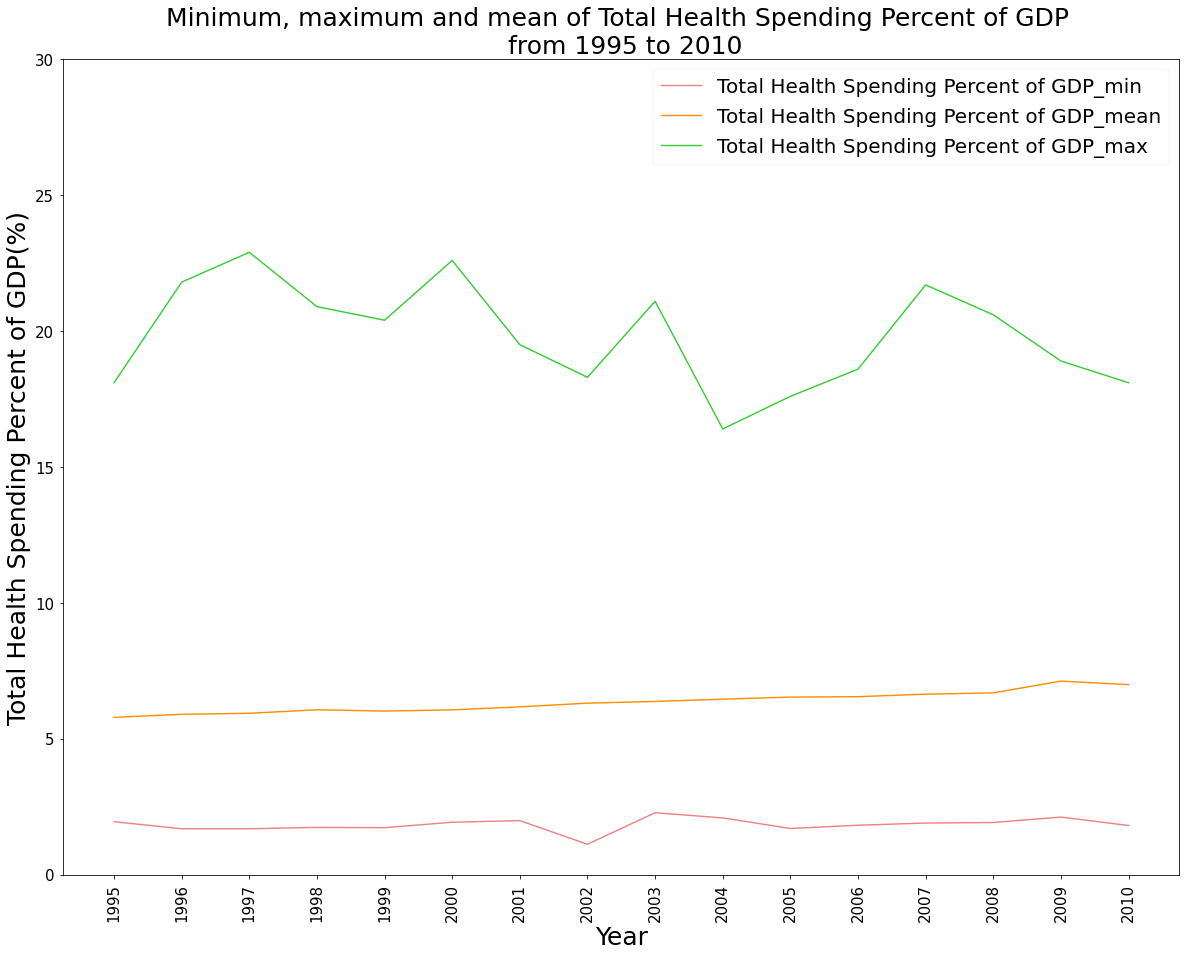

In [11]:
#Sketch a plot for DataFrame's Descriptive statistics - Health Spending
#Adjust the size, fontsize, color labels and title for the figure.
plt.style.use('seaborn-paper')
plt.figure(figsize=(20, 15))

plt.plot(Health_spending_des.index,Health_spending_des['min'],color='lightcoral',label='Total Health Spending Percent of GDP_min')
plt.plot(Health_spending_des.index,Health_spending_des['mean'],color='darkorange',label='Total Health Spending Percent of GDP_mean')
plt.plot(Health_spending_des.index,Health_spending_des['max'],color='limegreen',label='Total Health Spending Percent of GDP_max')


plt.xlabel("Year", fontsize=25)
plt.xticks(rotation=90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(0,30)
plt.ylabel("Total Health Spending Percent of GDP(%)",fontsize=25)
plt.title('Minimum, maximum and mean of Total Health Spending Percent of GDP \n from 1995 to 2010', fontsize = 25)
plt.legend(loc = 'best',prop={'size': 20})

plt.show()

In [12]:
#Read the Income Dataframe's descriptive statistics
#Transpose DataFrame index and columns for DataFrame's descriptive statistics.
Income_des = Income.describe().T
Income_des

,count,mean,std,min,25%,50%,75%,max
1800,195.0,1072.179487,605.373041,224.0,680.5,959.0,1240.0,4860.0
1801,195.0,1071.353846,602.816015,224.0,680.5,959.0,1240.0,4780.0
1802,195.0,1074.210256,614.245612,224.0,680.5,959.0,1240.0,5040.0
1803,195.0,1073.753846,608.330435,224.0,680.5,959.0,1245.0,4930.0
1804,195.0,1075.430769,617.123397,225.0,680.5,954.0,1250.0,5170.0
...,...,...,...,...,...,...,...,...
2046,195.0,34775.692308,36575.963727,1170.0,7290.0,22200.0,54750.0,192000.0
2047,195.0,35524.307692,37360.004510,1190.0,7445.0,22700.0,55900.0,196000.0
2048,195.0,36288.205128,38162.975396,1220.0,7610.0,23200.0,57100.0,200000.0
2049,195.0,37069.538462,38986.791899,1240.0,7770.0,23700.0,58350.0,205000.0


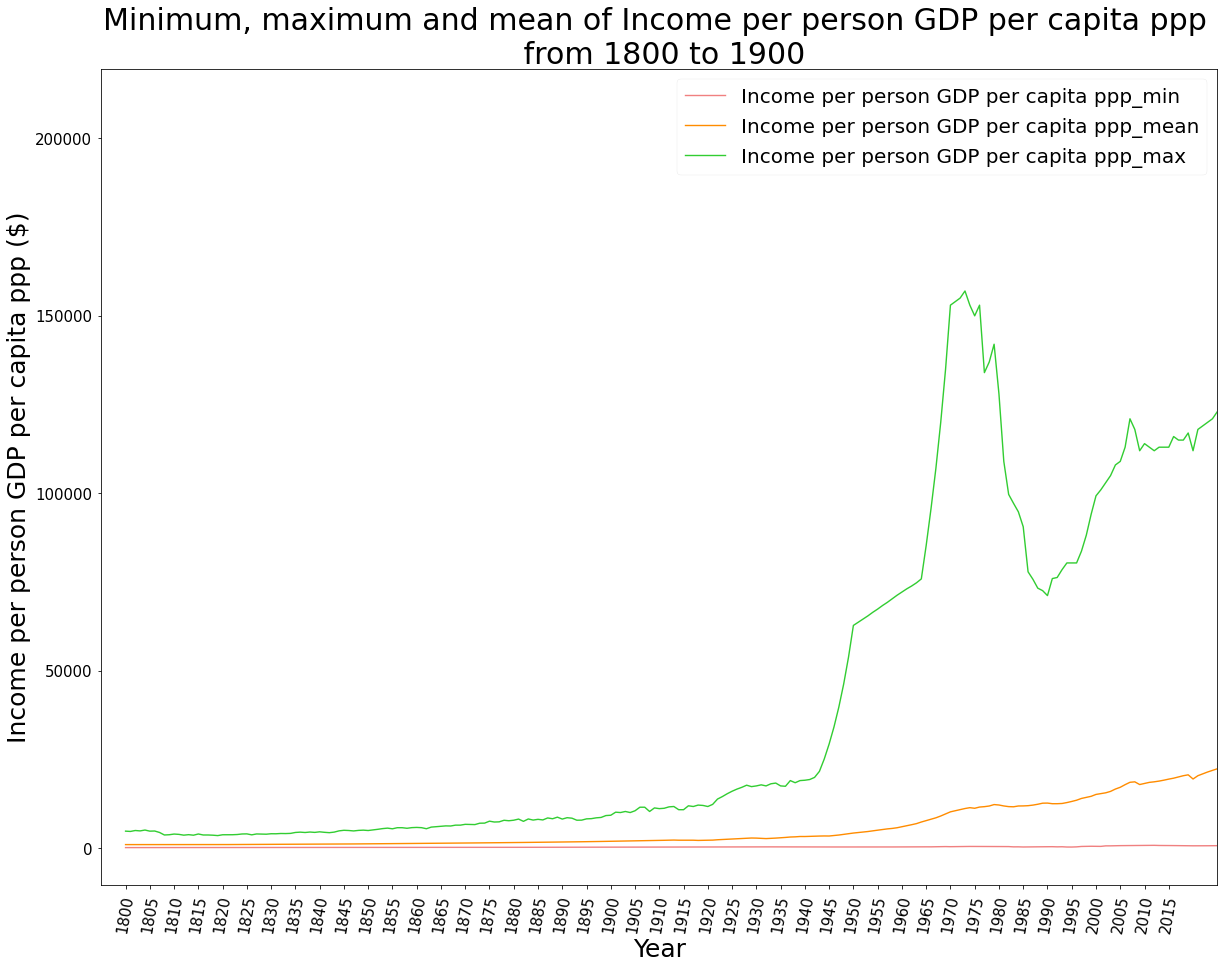

In [13]:
#Sketch a plot for DataFrame's Descriptive statistics - Income
#Adjust the size, fontsize, color labels and title for the figure.

plt.style.use('seaborn-paper')
plt.figure(figsize=(20, 15))
plt.plot(Income_des.index.astype('int'),Income_des['min'],color='lightcoral',label='Income per person GDP per capita ppp_min')
plt.plot(Income_des.index.astype('int'),Income_des['mean'],color='darkorange',label='Income per person GDP per capita ppp_mean')
plt.plot(Income_des.index.astype('int'),Income_des['max'],color='limegreen',label='Income per person GDP per capita ppp_max')


plt.xticks(np.arange(1800,2020,5),rotation=80,fontsize = 15)
plt.xlim(1795,2025)
plt.xlabel("Year",fontsize=25)
plt.yticks(fontsize = 15)
plt.ylabel("Income per person GDP per capita ppp ($)",fontsize=25)

plt.title("Minimum, maximum and mean of Income per person GDP per capita ppp \n from 1800 to 1900", fontsize = 30)
plt.legend(loc = 'upper right',prop={'size': 20})
plt.show()

In [14]:
#Read the Income Dataframe's descriptive statistics
#Transpose DataFrame index and columns for DataFrame's descriptive statistics.
HDI_des = HDI.describe().T
HDI_des

,count,mean,std,min,25%,50%,75%,max
1990,144.0,0.599653,0.165550,0.220,0.48025,0.6280,0.73200,0.871
1991,144.0,0.601854,0.166086,0.220,0.48075,0.6340,0.73300,0.871
1992,144.0,0.604187,0.166821,0.202,0.47550,0.6305,0.73525,0.873
1993,144.0,0.608229,0.167933,0.197,0.47675,0.6370,0.73925,0.877
1994,144.0,0.612347,0.169730,0.192,0.48300,0.6380,0.74625,0.883
1995,148.0,0.615669,0.168708,0.231,0.48000,0.6375,0.74900,0.888
1996,148.0,0.621007,0.168904,0.244,0.47650,0.6465,0.75700,0.890
1997,148.0,0.626182,0.169017,0.248,0.47775,0.6455,0.76450,0.893
1998,148.0,0.631446,0.169395,0.255,0.48400,0.6560,0.76925,0.904
1999,151.0,0.632318,0.170653,0.259,0.47400,0.6540,0.77450,0.909


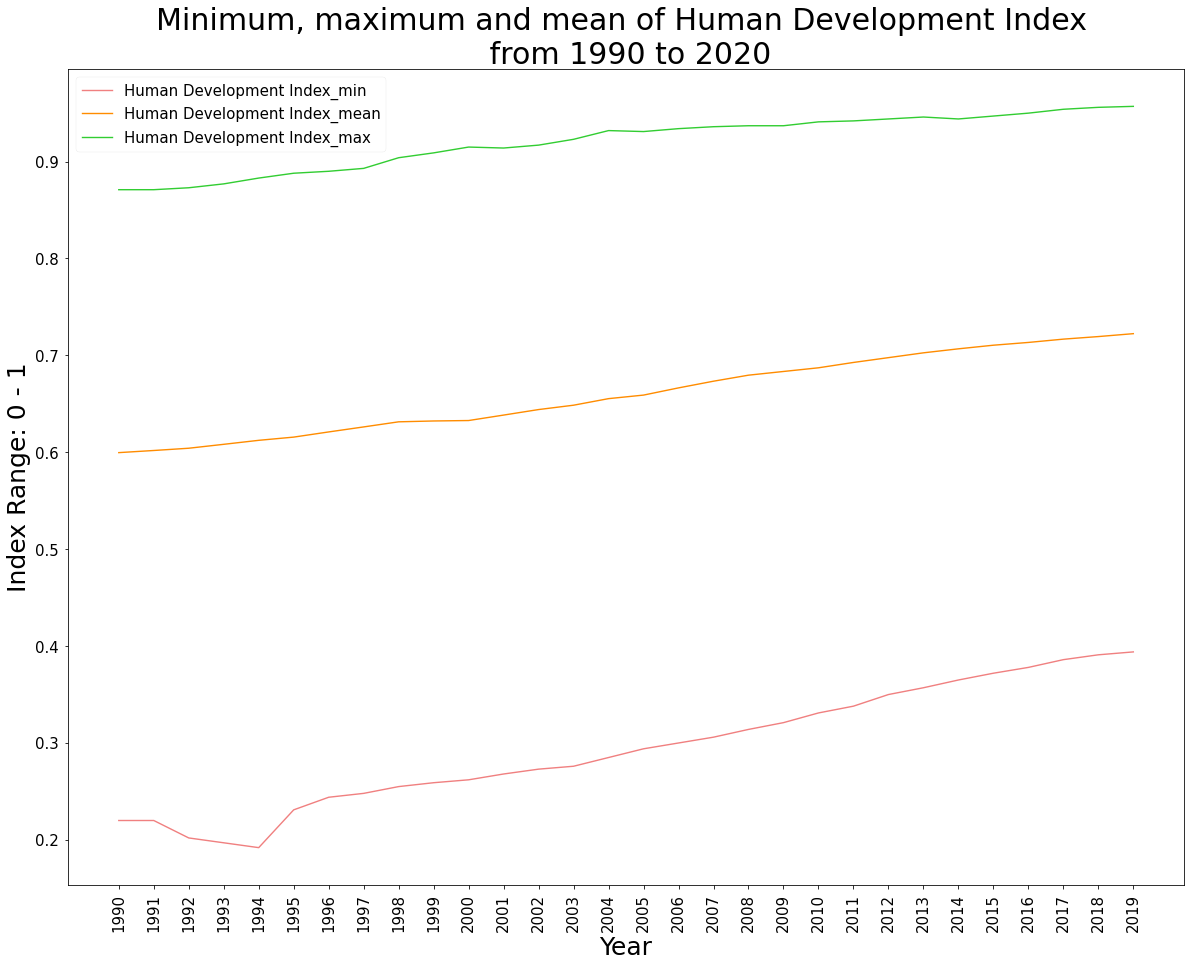

In [15]:
#Sketch a plot for DataFrame's Descriptive statistics - HDI
#Adjust the size, fontsize, color labels and title for the figure.


plt.style.use('seaborn-paper')
plt.figure(figsize=(20, 15))
plt.plot(HDI_des.index,HDI_des['min'],color='lightcoral',label='Human Development Index_min')
plt.plot(HDI_des.index,HDI_des['mean'],color='darkorange',label='Human Development Index_mean')
plt.plot(HDI_des.index,HDI_des['max'],color='limegreen',label='Human Development Index_max')


plt.xticks(rotation=90,fontsize = 15)
plt.xlabel("Year", fontsize=25)
plt.yticks(fontsize = 15)
plt.ylabel("Index Range: 0 - 1",fontsize=25)

plt.title("Minimum, maximum and mean of Human Development Index \n from 1990 to 2020",fontsize = 30)
plt.legend(loc = 'best',prop={'size': 15})
plt.show()

In [16]:
#Read the Life Expectancy Years Dataframe's descriptive statistics
#Transpose DataFrame index and columns for DataFrame's descriptive statistics.

Life_Expectancy_des = Life_Expectancy.describe().T
Life_Expectancy_des

,count,mean,std,min,25%,50%,75%,max
1800,186.0,31.503763,3.809510,23.4,29.025,31.75,33.875,42.9
1801,186.0,31.463441,3.801217,23.4,28.925,31.65,33.900,40.3
1802,186.0,31.480108,3.932344,23.4,28.900,31.55,33.875,44.4
1803,186.0,31.385484,3.955872,19.6,28.900,31.50,33.675,44.8
1804,186.0,31.460753,3.928388,23.4,28.925,31.55,33.775,42.8
...,...,...,...,...,...,...,...,...
2096,186.0,83.955376,5.766333,67.0,80.325,84.60,88.300,94.0
2097,186.0,84.076344,5.756555,67.1,80.425,84.70,88.400,94.1
2098,186.0,84.193548,5.750616,67.2,80.525,84.80,88.500,94.2
2099,186.0,84.312903,5.743805,67.3,80.700,84.90,88.675,94.3


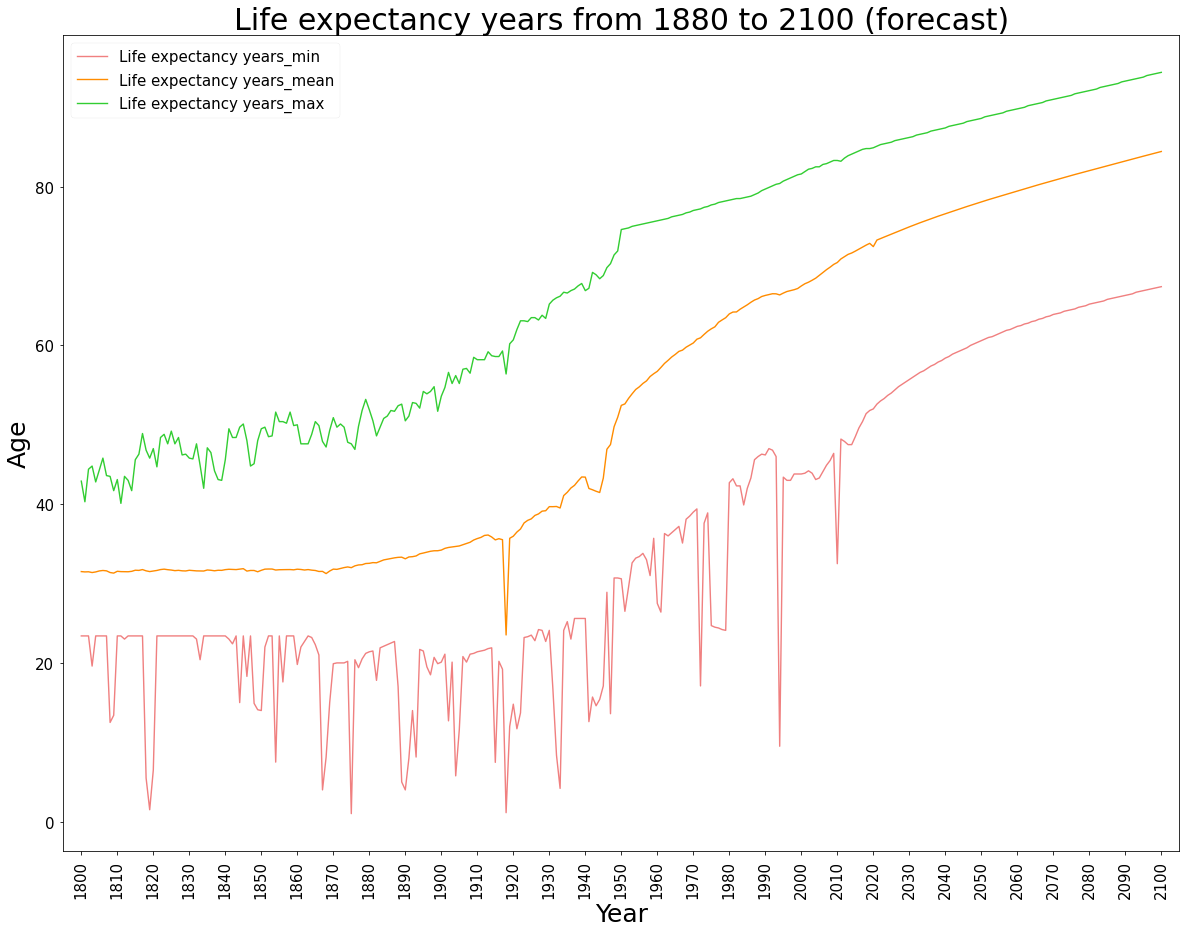

In [17]:
#Sketch a plot for DataFrame's Descriptive statistics - Life Expectancy years
#Adjust the size, fontsize, color labels and title for the figure.
plt.style.use('seaborn-paper')
plt.figure(figsize=(20, 15))

plt.plot(Life_Expectancy_des.index.astype('int'),Life_Expectancy_des['min'],color='lightcoral',label='Life expectancy years_min')
plt.plot(Life_Expectancy_des.index.astype('int'),Life_Expectancy_des['mean'],color='darkorange',label='Life expectancy years_mean')
plt.plot(Life_Expectancy_des.index.astype('int'),Life_Expectancy_des['max'],color='limegreen',label='Life expectancy years_max')


plt.xticks(np.arange(1800,2105,10),rotation=90,fontsize = 15)
plt.xlim(1795,2105)

plt.xlabel("Year",fontsize=25)
plt.yticks(fontsize = 15)
plt.ylabel("Age",fontsize=25)
plt.title("Life expectancy years from 1880 to 2100 (forecast)",fontsize = 30)
plt.legend(loc = 'best',prop={'size': 15})
plt.show()

## （2）

In [18]:
#Merge DataFrames
df_GDPnHealth=pd.merge(GDP_des.reset_index()[['index','mean']],
                       Health_spending_des.reset_index()[['index','mean']],
                       on='index',how='right')

df_GDPnHealth

,index,mean_x,mean_y
0,1995,10564.043478,5.790265
1,1996,10784.641304,5.901316
2,1997,11394.598930,5.939000
3,1998,11640.374332,6.067330
4,1999,11907.319149,6.019634
5,2000,12527.113990,6.064555
6,2001,12643.536082,6.175632
7,2002,13018.527638,6.311895
8,2003,13261.517588,6.373789
9,2004,13706.600000,6.457947


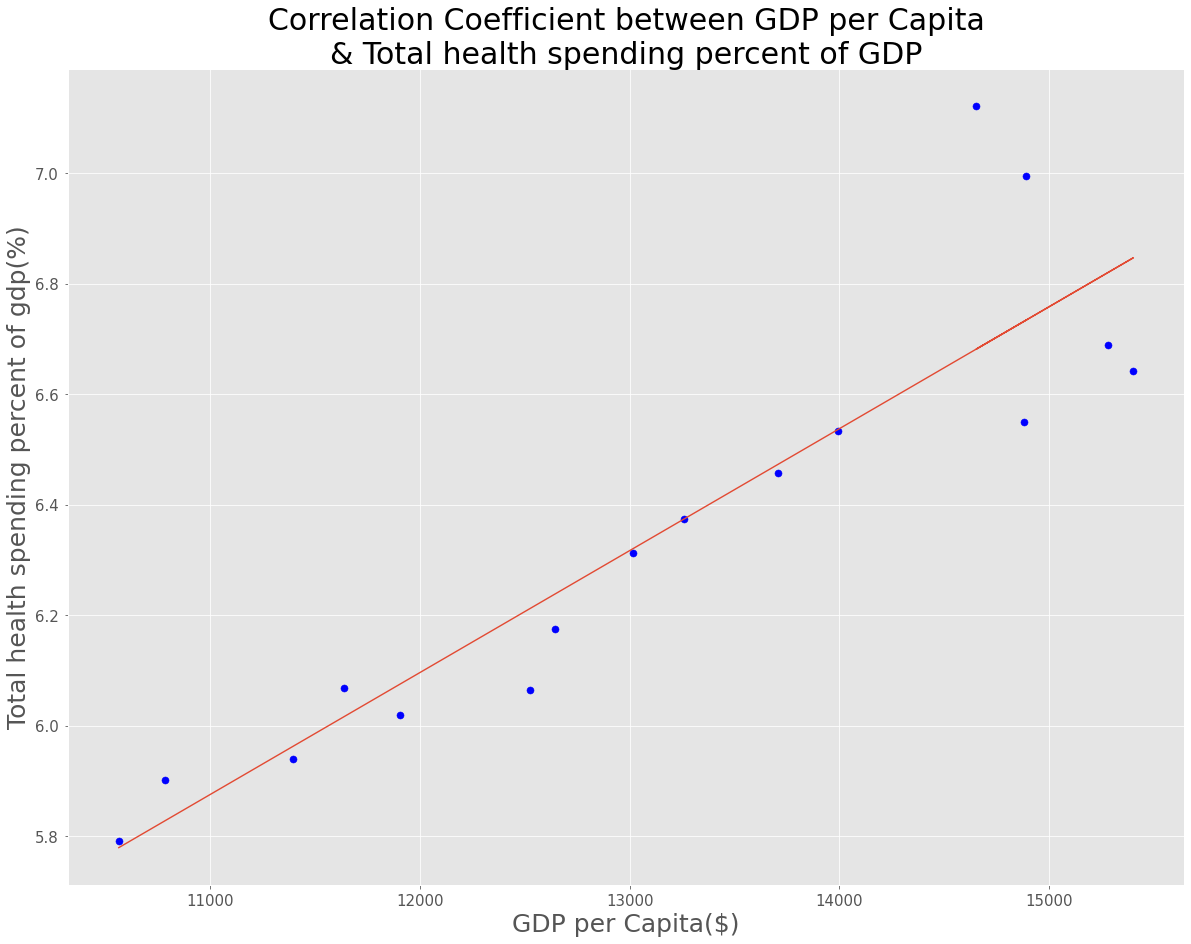

In [19]:

#Sketch a plot for the merged Dataframe
#Add a trend line

tcoefficient = np.polyfit(df_GDPnHealth['mean_x'],df_GDPnHealth['mean_y'],1)
tfunction = np.poly1d(tcoefficient)
tvalue = tfunction(df_GDPnHealth['mean_x'])


plt.style.use(style = 'ggplot')
plt.figure(figsize=(20, 15))

plt.scatter(df_GDPnHealth['mean_x'], df_GDPnHealth['mean_y'], color = 'blue', marker = 'o', s = 50)
plt.plot (df_GDPnHealth['mean_x'], tvalue)


plt.xticks(fontsize = 15)
plt.xlabel("GDP per Capita($)",fontsize=25)
plt.ylabel("Total health spending percent of gdp(%)",fontsize=25)
plt.yticks(fontsize = 15)

plt.title("Correlation Coefficient between GDP per Capita\n& Total health spending percent of GDP", fontsize = 30)

plt.show()

In [20]:
#Merge DataFrame: GDP + Income
df_GDPnIncome = pd.merge(GDP_des.reset_index()[['index','mean']],
                         Income_des.reset_index()[['index','mean']],
                         on='index',how='left')
df_GDPnIncome

,index,mean_x,mean_y
0,1960,4612.390805,6093.635897
1,1961,4625.912088,6385.087179
2,1962,4755.043956,6672.928205
3,1963,4894.846154,6979.420513
4,1964,5153.417582,7431.466667
...,...,...,...
56,2016,16001.765854,19778.866667
57,2017,16241.204878,20114.600000
58,2018,16445.264706,20473.256410
59,2019,16670.455446,20724.138462


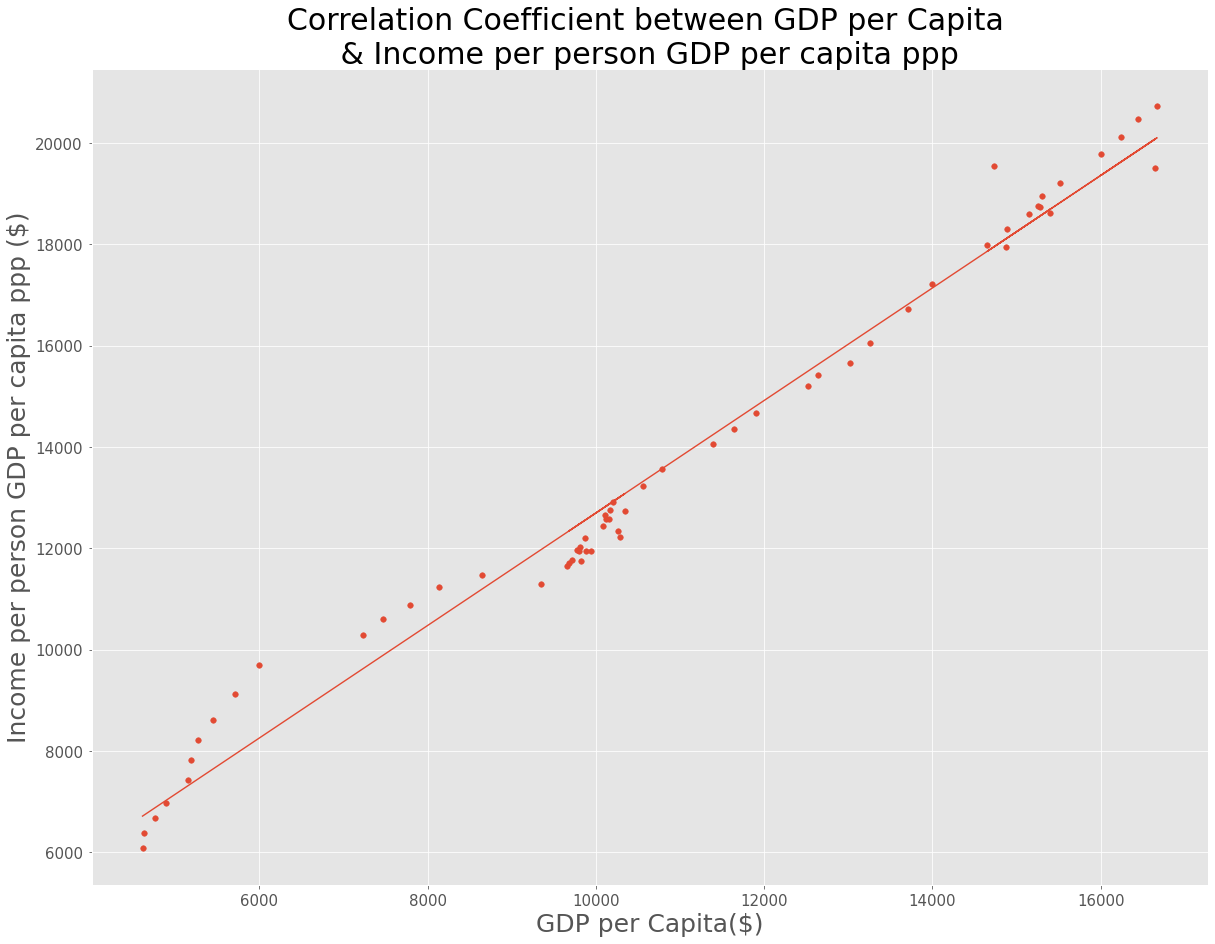

In [21]:
#Sketch a plot for the merged Dataframe
#Add a trendline

tcoefficient=np.polyfit(df_GDPnIncome['mean_x'],df_GDPnIncome['mean_y'],1)
tfunction=np.poly1d(tcoefficient)
tvalue=tfunction(df_GDPnIncome['mean_x'])

plt.style.use('ggplot')
plt.figure(figsize=(20, 15))

plt.scatter(df_GDPnIncome['mean_x'],df_GDPnIncome['mean_y'])
plt.plot(df_GDPnIncome['mean_x'],tvalue)

plt.xticks(fontsize = 15)
plt.xlabel("GDP per Capita($)",fontsize=25)
plt.ylabel("Income per person GDP per capita ppp ($)",fontsize=25)
plt.yticks(fontsize = 15)

plt.title("Correlation Coefficient between GDP per Capita \n & Income per person GDP per capita ppp ",fontsize = 30)
plt.show()

In [22]:
#Merge DataFrame: GDP + HDI
df_GDPnHDI=pd.merge(GDP_des.reset_index()[['index','mean']],
                    HDI_des.reset_index()[['index','mean']],
                    on='index',how='right')
df_GDPnHDI

,index,mean_x,mean_y
0,1990,10162.592814,0.599653
1,1991,10156.333333,0.601854
2,1992,10126.717647,0.604187
3,1993,10109.181287,0.608229
4,1994,10207.317919,0.612347
5,1995,10564.043478,0.615669
6,1996,10784.641304,0.621007
7,1997,11394.598930,0.626182
8,1998,11640.374332,0.631446
9,1999,11907.319149,0.632318


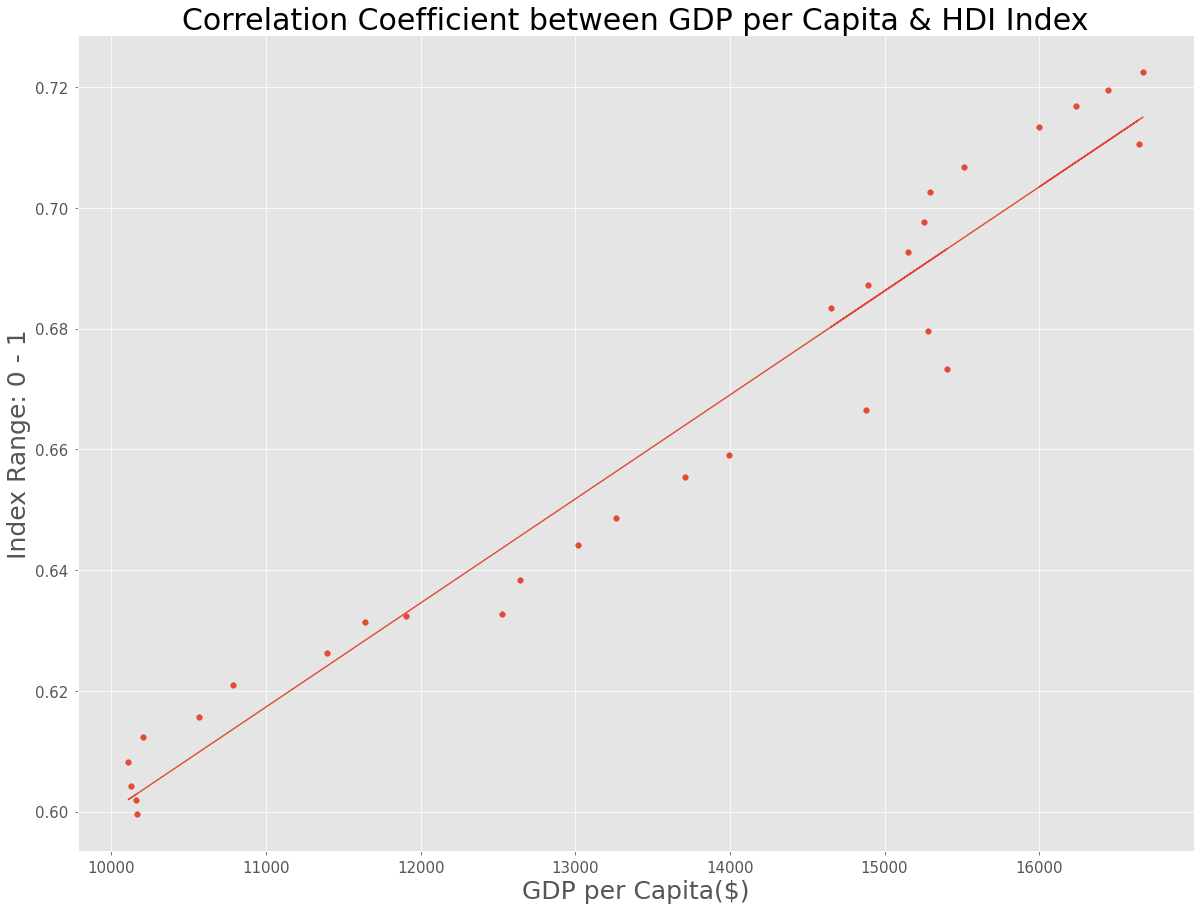

In [23]:
#Sketch a plot for the merged Dataframe
#Add a trendline
tcoefficient = np.polyfit(df_GDPnHDI['mean_x'],df_GDPnHDI['mean_y'],1)
tfunction = np.poly1d(tcoefficient)
tvalue = tfunction(df_GDPnHDI['mean_x'])

plt.style.use('ggplot')
plt.figure(figsize=(20, 15))
plt.scatter(df_GDPnHDI['mean_x'],df_GDPnHDI['mean_y'])
plt.plot(df_GDPnHDI['mean_x'],tvalue)

plt.xticks(fontsize = 15)
plt.xlabel("GDP per Capita($)",fontsize=25)
plt.yticks(fontsize = 15)
plt.ylabel("Index Range: 0 - 1",fontsize=25)
plt.title("Correlation Coefficient between GDP per Capita & HDI Index",fontsize = 30)

plt.show()


In [24]:
#Merge DataFrame: GDP + Life Expectancy Year
df_GDPnLife=pd.merge(GDP_des.reset_index()[['index','mean']],
             Life_Expectancy_des.reset_index()[['index','mean']],
             on='index',how='left')
df_GDPnLife

,index,mean_x,mean_y
0,1960,4612.390805,56.733846
1,1961,4625.912088,57.221026
2,1962,4755.043956,57.729744
3,1963,4894.846154,58.119487
4,1964,5153.417582,58.539487
...,...,...,...
56,2016,16001.765854,72.133846
57,2017,16241.204878,72.394359
58,2018,16445.264706,72.632821
59,2019,16670.455446,72.857949


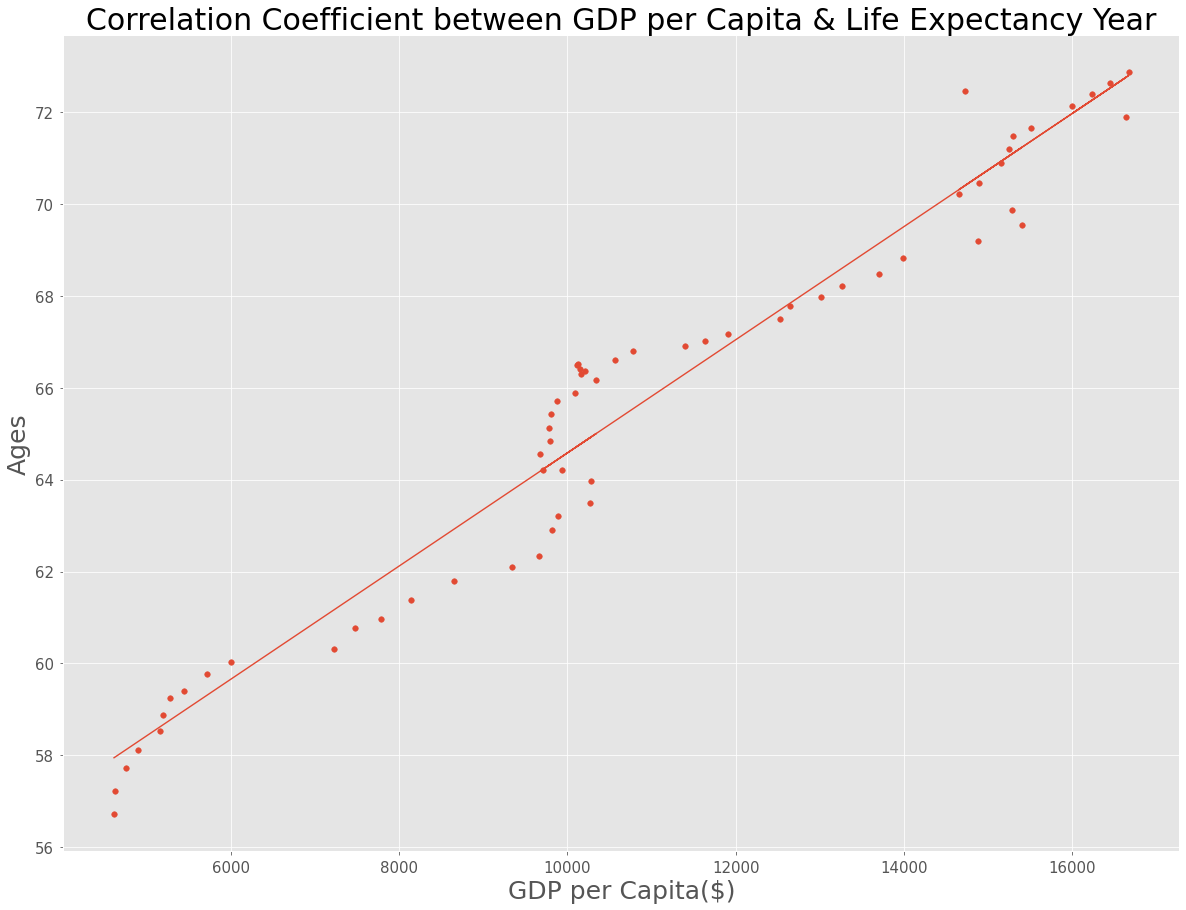

In [25]:

#Add a trend line
tcoefficient=np.polyfit(df_GDPnLife['mean_x'],df_GDPnLife['mean_y'],1)
tfunction=np.poly1d(tcoefficient)
tvalue=tfunction(df_GDPnLife['mean_x'])

plt.style.use('ggplot')
plt.figure(figsize=(20, 15))

plt.scatter(df_GDPnLife['mean_x'],df_GDPnLife['mean_y'])
plt.plot(df_GDPnLife['mean_x'],tvalue)

plt.xticks(fontsize = 15)
plt.xlabel("GDP per Capita($)",fontsize = 25)
plt.yticks(fontsize = 15)
plt.ylabel("Ages",fontsize = 25)

plt.title("Correlation Coefficient between GDP per Capita & Life Expectancy Year",fontsize = 30)
plt.show()

## (2)ii

In [26]:
#Generate some DataFrames for compare and contrast purpose

Health_spending_cc = Health_spending[Health_spending['country'].isin(['South Africa','Germany','China','Australia'])]
Health_spending_cc.set_index(["country"], inplace=True)
Income_cc = Income[Income['country'].isin(['South Africa','Germany','China','Australia'])]
Income_cc.set_index(["country"], inplace=True)
HDI_cc=HDI[HDI['country'].isin(['South Africa','Germany','China','Australia'])]
HDI_cc.set_index(["country"], inplace=True)
Life_Expectancy_cc=Life_Expectancy[Life_Expectancy['country'].isin(['South Africa','Germany','China','Australia'])]
Life_Expectancy_cc.set_index(["country"], inplace=True)




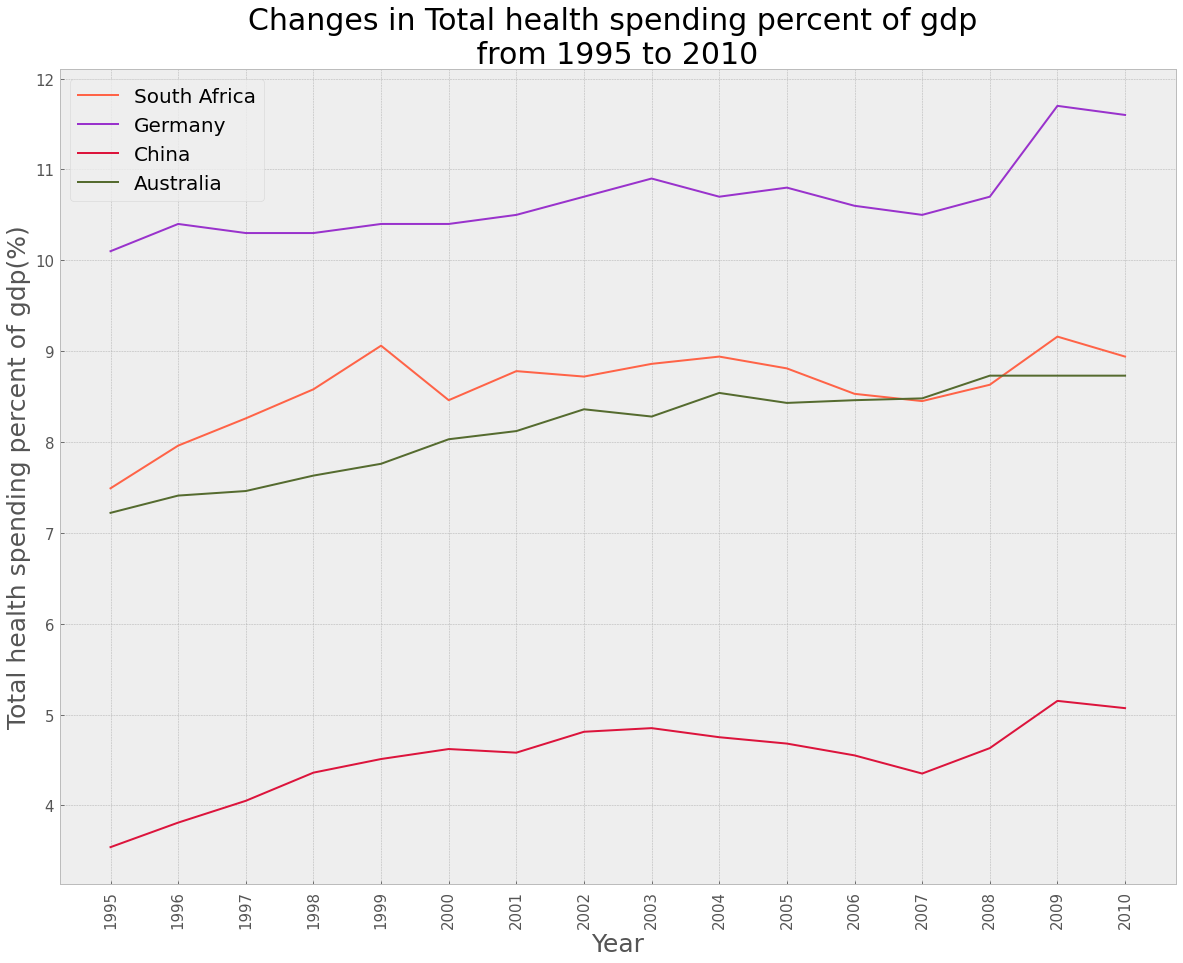

In [27]:
#Sketch the comparision figure - Health Spending
#Adjust the size, fontsize, color labels and title for the figure.
plt.style.use("bmh")

plt.figure(figsize=(20, 15))

plt.plot(Health_spending_cc.T.index, Health_spending_cc.T['South Africa'],color='tomato',label='South Africa')
plt.plot(Health_spending_cc.T.index, Health_spending_cc.T['Germany'],color='darkorchid',label='Germany')
plt.plot(Health_spending_cc.T.index, Health_spending_cc.T['China'],color='crimson',label='China')
plt.plot(Health_spending_cc.T.index, Health_spending_cc.T['Australia'],color='darkolivegreen',label='Australia')



plt.xticks(rotation=90)
plt.xticks(fontsize = 15)
plt.xlabel("Year",fontsize = 25)
plt.yticks(fontsize = 15)
plt.ylabel("Total health spending percent of gdp(%)", fontsize = 25)

plt.title("Changes in Total health spending percent of gdp \n from 1995 to 2010 ", fontsize = 30)
plt.legend(loc = 'best',prop={'size': 20})
plt.show()

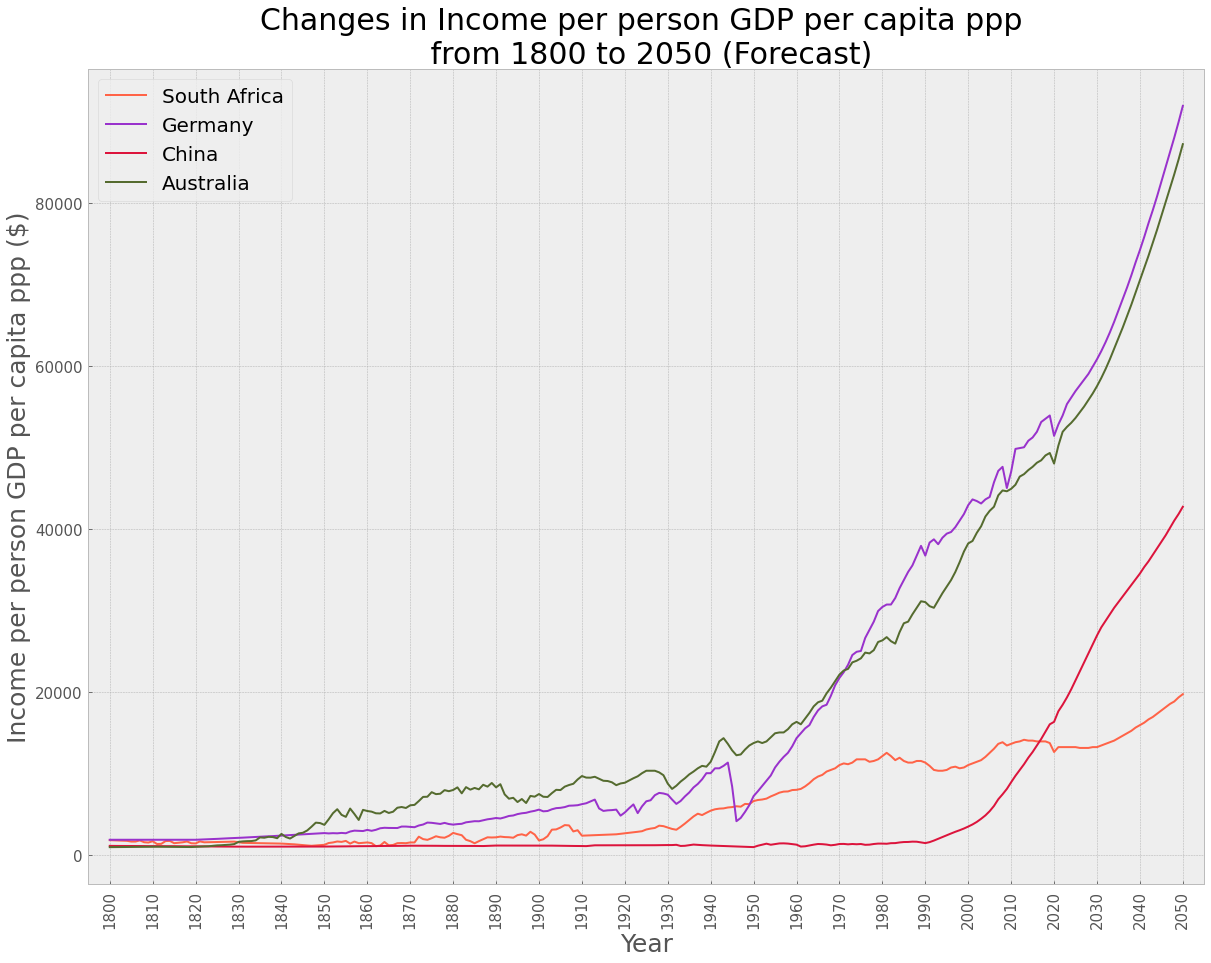

In [28]:
#Sketch the comparision figure - Income
#Adjust the size, fontsize, color labels and title for the figure.

plt.style.use("bmh")
plt.figure(figsize=(20, 15))

plt.plot(Income_cc.T.index.astype('int'),Income_cc.T['South Africa'],color='tomato',label='South Africa')
plt.plot(Income_cc.T.index.astype('int'),Income_cc.T['Germany'],color='darkorchid',label='Germany')
plt.plot(Income_cc.T.index.astype('int'),Income_cc.T['China'],color='crimson',label='China')
plt.plot(Income_cc.T.index.astype('int'),Income_cc.T['Australia'],color='darkolivegreen',label='Australia')

plt.xticks(np.arange(1800,2055,10),rotation=90,fontsize = 15)
plt.xlim(1795,2055)
plt.tick_params(labelsize=15)
plt.xlabel("Year",fontsize = 25)
plt.yticks(fontsize = 15)
plt.ylabel("Income per person GDP per capita ppp ($)",fontsize = 25)

plt.title("Changes in Income per person GDP per capita ppp \n from 1800 to 2050 (Forecast)", fontsize = 30)
plt.legend(loc = 'best',prop={'size': 20})
plt.show()

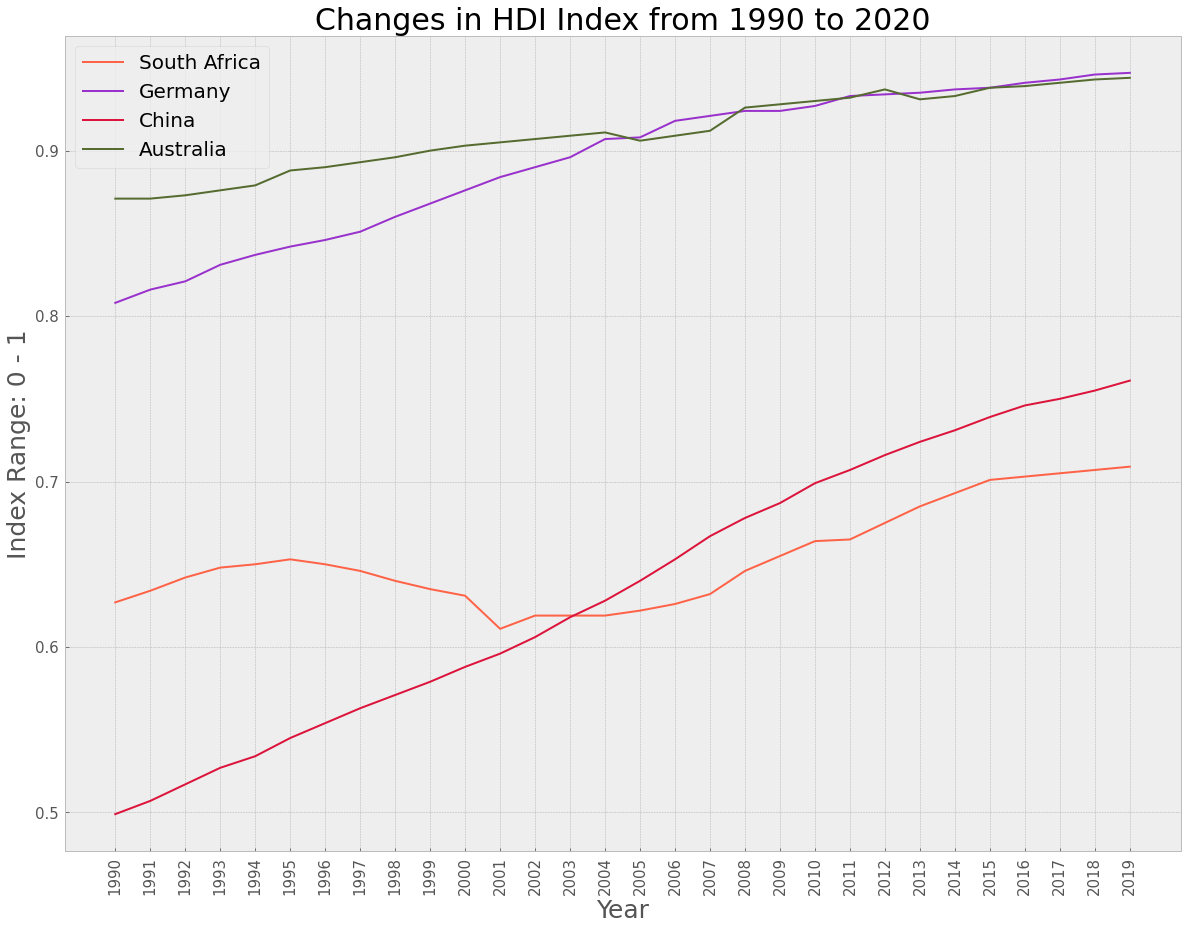

In [29]:
#Sketch the comparision figure - HDI
#Adjust the size, fontsize, color labels and title for the figure.

plt.style.use("bmh")
plt.figure(figsize=(20, 15))

plt.plot(HDI_cc.T.index.astype('int'),HDI_cc.T['South Africa'],color='tomato',label='South Africa')
plt.plot(HDI_cc.T.index.astype('int'),HDI_cc.T['Germany'],color='darkorchid',label='Germany')
plt.plot(HDI_cc.T.index.astype('int'),HDI_cc.T['China'],color='crimson',label='China')
plt.plot(HDI_cc.T.index.astype('int'),HDI_cc.T['Australia'],color='darkolivegreen',label='Australia')

plt.xticks(np.arange(1990,2020,1),rotation=90, fontsize = 15)
plt.xlabel("Year",fontsize = 25)
plt.yticks(fontsize = 15)
plt.ylabel("Index Range: 0 - 1",fontsize = 25)

plt.title("Changes in HDI Index from 1990 to 2020", fontsize = 30)
plt.legend(loc = 'best',prop={'size': 20})
plt.show()


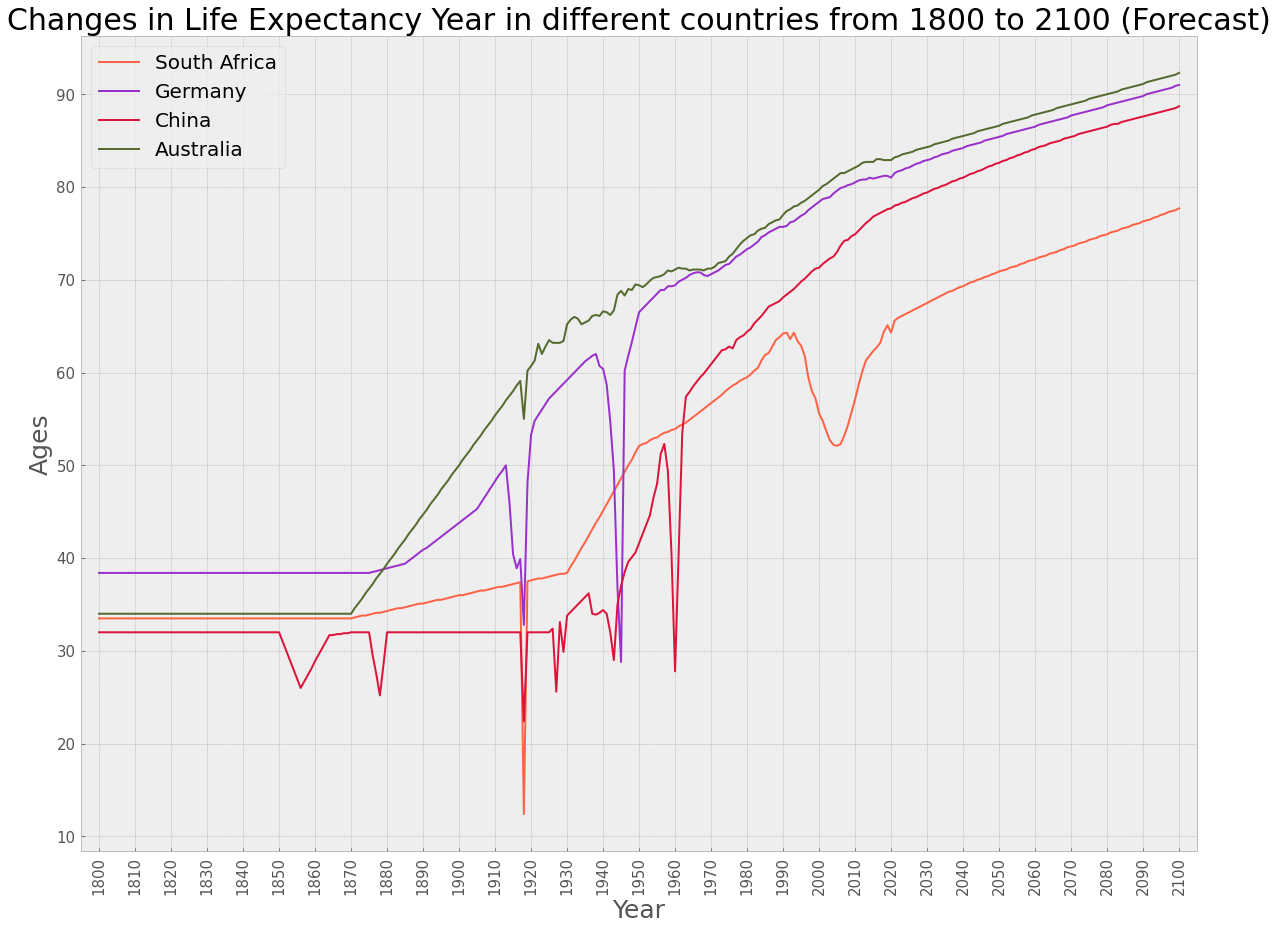

In [30]:
#Sketch the comparision figure - Life Expectancy Year
#Adjust the size, fontsize, color labels and title for the figure.

plt.style.use("bmh")
plt.figure(figsize=(20, 15))

plt.plot(Life_Expectancy_cc.T.index.astype('int'),Life_Expectancy_cc.T['South Africa'],color='tomato',label='South Africa')
plt.plot(Life_Expectancy_cc.T.index.astype('int'),Life_Expectancy_cc.T['Germany'],color='darkorchid',label='Germany')
plt.plot(Life_Expectancy_cc.T.index.astype('int'),Life_Expectancy_cc.T['China'],color='crimson',label='China')
plt.plot(Life_Expectancy_cc.T.index.astype('int'),Life_Expectancy_cc.T['Australia'],color='darkolivegreen',label='Australia')

plt.xticks(np.arange(1800,2105,10),rotation=90, fontsize = 15)
plt.xlim(1795,2105)
plt.tick_params(labelsize=15)
plt.xlabel("Year",fontsize = 25)
plt.yticks(fontsize = 15)
plt.ylabel("Ages",fontsize = 25)
plt.title("Changes in Life Expectancy Year in different countries from 1800 to 2100 (Forecast)", fontsize = 30)
plt.legend(loc = 'best',prop={'size': 20}) 
plt.show()

In [31]:
#It is necessary to make a comparison chart of GDP between countries
#so create another merged DataFrame
GDP_cc = GDP[GDP['country']. isin(['South Africa','Germany','China','Australia'])]
GDP_cc.set_index(["country"], inplace = True)

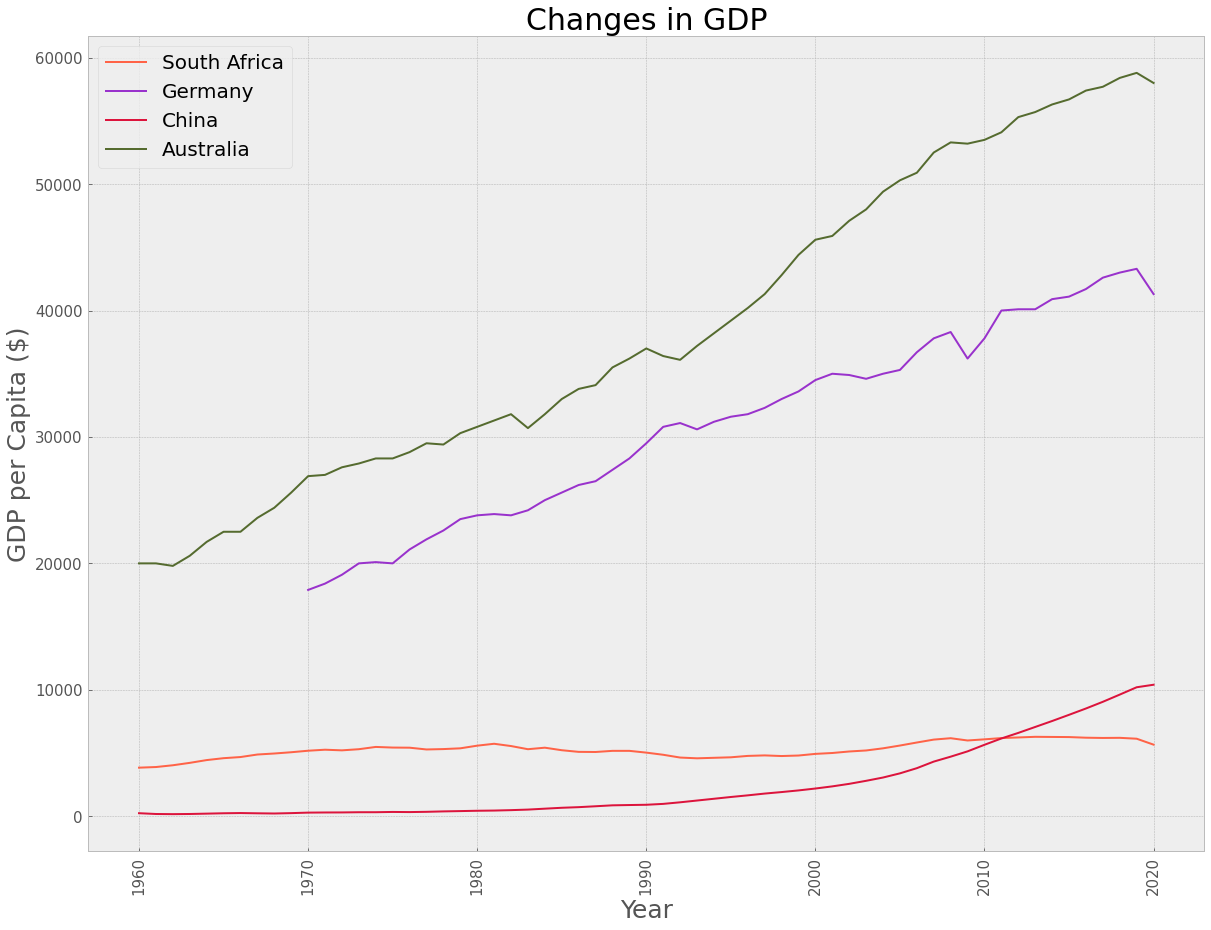

In [32]:
#Sketch the comparision figure - GDP
#Adjust the size, fontsize, color labels and title for the figure.
plt.style.use("bmh")
plt.figure(figsize=(20, 15))

plt.plot(GDP_cc.T.index.astype('int'),GDP_cc.T['South Africa'],color='tomato',label='South Africa')
plt.plot(GDP_cc.T.index.astype('int'),GDP_cc.T['Germany'],color='darkorchid',label='Germany')
plt.plot(GDP_cc.T.index.astype('int'),GDP_cc.T['China'],color='crimson',label='China')
plt.plot(GDP_cc.T.index.astype('int'),GDP_cc.T['Australia'],color='darkolivegreen',label='Australia')

plt.xticks(rotation=90, fontsize = 15)
plt.tick_params(labelsize=15)
plt.xlabel("Year",fontsize = 25)
plt.yticks(fontsize = 15)
plt.ylabel("GDP per Capita ($)",fontsize = 25)
plt.title("Changes in GDP", fontsize = 30)
plt.legend(loc = 'best',prop={'size': 20}) 
plt.show()

In [33]:
#----------End of The Project----------